<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/feature%2Fadd-data-generators-to-fix-ram-problem/combine_npz_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Combine npz files 256_256

This is a notebook for the last step in the prepare data pipeline as we did not have enough RAM to run it locally. To train the model on the entire dataset it is more convenient to have all tile-arrays of all images in one .npz file. 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

%cd drive/MyDrive/MachineLearning
! ls

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
data_colab			metrics  original_data
Deep-Learning-with-PyTorch.pdf	models	 Titanic_Challenge.ipynb


In [7]:
#! git clone https://github.com/emely3h/Geospatial_ML.git
#%cd Geospatial_ML
#! ls
! git checkout feature/add-data-generators-to-fix-ram-problem

Branch 'feature/add-data-generators-to-fix-ram-problem' set up to track remote branch 'feature/add-data-generators-to-fix-ram-problem' from 'origin'.
Switched to a new branch 'feature/add-data-generators-to-fix-ram-problem'


In [21]:
! git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 324 bytes | 4.00 KiB/s, done.
From https://github.com/emely3h/Geospatial_ML
   0d9fba9..dc6dc8a  feature/add-data-generators-to-fix-ram-problem -> origin/feature/add-data-generators-to-fix-ram-problem
Updating 0d9fba9..dc6dc8a
Fast-forward
 data_exploration/stats.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [69]:
import numpy as np
import os
import datetime
from sklearn.model_selection import train_test_split
from prepare_data.concatenate import create_mmaps
from data_exploration.stats import Mask_Stats
import matplotlib.pyplot as plt

In [15]:
def print_img_shapes(data_path):
  total_tiles = 0
  for file in os.listdir(data_path):
    if not os.path.isdir(os.path.join(data_path, file)) and file.startswith('2022'):
    
      print(f'Image: {file}')
      array = np.load(f'{data_path}/{file}')
      total_tiles += array['x_input'].shape[0]
      print(array['x_input'].shape)
      print(array['y_mask'].shape)
      print()

  print(f'Total amount of tiles {total_tiles}')

## 1. Preparing non-overlapping tiles

In [16]:
data_path = "../data_colab/256_256"
print_img_shapes(data_path)

Image: 2022_10_13.npz
(534, 256, 256, 5)
(534, 256, 256)

Image: 2022_07_15.npz
(534, 256, 256, 5)
(534, 256, 256)

Image: 2022_09_18.npz
(708, 256, 256, 5)
(708, 256, 256)

Image: 2022_06_20.npz
(761, 256, 256, 5)
(761, 256, 256)

Image: 2022_10_23.npz
(702, 256, 256, 5)
(702, 256, 256)

Image: 2022_07_25.npz
(761, 256, 256, 5)
(761, 256, 256)

Image: 2022_08_04.npz
(798, 256, 256, 5)
(798, 256, 256)

Image: 2022_07_10.npz
(822, 256, 256, 5)
(822, 256, 256)

Image: 2022_07_30.npz
(716, 256, 256, 5)
(716, 256, 256)

Image: 2022_08_14.npz
(711, 256, 256, 5)
(711, 256, 256)

Image: 2022_08_24.npz
(801, 256, 256, 5)
(801, 256, 256)

Image: 2022_09_03.npz
(728, 256, 256, 5)
(728, 256, 256)

Image: 2022_12_12.npz
(578, 256, 256, 5)
(578, 256, 256)

Image: 2022_09_08.npz
(561, 256, 256, 5)
(561, 256, 256)

Image: 2022_12_02.npz
(695, 256, 256, 5)
(695, 256, 256)

Image: 2022_09_13.npz
(711, 256, 256, 5)
(711, 256, 256)

Total amount of tiles 11121


In [28]:
total_tiles = 11121

### 1. Concatenating tiles of all images 

In [10]:
create_mmaps(total_tiles, '../data_colab/256_256', 'combined/x_input.npy', 'combined/y_mask.npy', 'combined/compressed.npz')

Started at: 2023-04-02 18:24:57.674674
loading file 1: 2022_10_13.npz shape: (534, 256, 256, 5) (534, 256, 256)
Chunk 0
Npz file indexes: 0 : 500
output file indexes: 0 : 500  Chunk shape (500, 256, 256) min: 0 max: 2 uniques: [0 1 2] type: <class 'numpy.uint8'>
Rest: 34
Npz file indexes: 500 : 534
output file indexes: 500 : 534  Chunk shape (34, 256, 256) min: 0 max: 2 uniques: [0 1 2] type: <class 'numpy.uint8'>

loading file 2: 2022_07_15.npz shape: (534, 256, 256, 5) (534, 256, 256)
Chunk 0
Npz file indexes: 0 : 500
output file indexes: 534 : 1034  Chunk shape (500, 256, 256) min: 0 max: 2 uniques: [0 1 2] type: <class 'numpy.uint8'>
Rest: 34
Npz file indexes: 500 : 534
output file indexes: 1034 : 1068  Chunk shape (34, 256, 256) min: 0 max: 2 uniques: [0 1 2] type: <class 'numpy.uint8'>

loading file 3: 2022_09_18.npz shape: (708, 256, 256, 5) (708, 256, 256)
Chunk 0
Npz file indexes: 0 : 500
output file indexes: 1068 : 1568  Chunk shape (500, 256, 256) min: 0 max: 2 uniques: [0 1

In [27]:
def test_concatenating():
  y_mask_mm = np.memmap( f'{data_path}/combined/y_mask.npy', shape=(total_tiles, 256, 256),  dtype=np.uint8, mode='r')
  start_idx_mm = 0
  end_idx_mm = 0
  for file in os.listdir(data_path):
    if not os.path.isdir(os.path.join(data_path, file)) and file.startswith('2022'):
      print(f'Test file: {file}')

      y_mask_npz = np.load(f'{data_path}/{file}')['y_mask']

      stats_npz = Mask_Stats(y_mask_npz)
      end_idx_mm += y_mask_npz.shape[0]

      stats_mm = Mask_Stats(y_mask_mm[start_idx_mm:end_idx_mm])
      print(f'Land pixels: npz: {stats_npz.pix_land} mm: {stats_mm.pix_land}')
      assert stats_npz.pix_land == stats_mm.pix_land
      print(f'Valid pixels: npz: {stats_npz.pix_valid} mm: {stats_mm.pix_valid}')
      assert stats_npz.pix_valid == stats_mm.pix_valid
      print(f'Invalid pixels: npz: {stats_npz.pix_invalid} mm: {stats_mm.pix_invalid}')
      assert stats_npz.pix_invalid == stats_mm.pix_invalid
      start_idx_mm = end_idx_mm
      print()
# todo: only tests mask tiles, not input tiles

test_concatenating()

Test file: 2022_10_13.npz
Land pixels: npz: 14807654 mm: 14807654
Valid pixels: npz: 6006843 mm: 6006843
Invalid pixels: npz: 14181727 mm: 14181727

Test file: 2022_07_15.npz
Land pixels: npz: 13916296 mm: 13916296
Valid pixels: npz: 3488390 mm: 3488390
Invalid pixels: npz: 17591538 mm: 17591538

Test file: 2022_09_18.npz
Land pixels: npz: 19937643 mm: 19937643
Valid pixels: npz: 22695686 mm: 22695686
Invalid pixels: npz: 3766159 mm: 3766159

Test file: 2022_06_20.npz
Land pixels: npz: 23203896 mm: 23203896
Valid pixels: npz: 21241348 mm: 21241348
Invalid pixels: npz: 5427652 mm: 5427652

Test file: 2022_10_23.npz
Land pixels: npz: 20581484 mm: 20581484
Valid pixels: npz: 5006533 mm: 5006533
Invalid pixels: npz: 20418255 mm: 20418255

Test file: 2022_07_25.npz
Land pixels: npz: 23049358 mm: 23049358
Valid pixels: npz: 23504823 mm: 23504823
Invalid pixels: npz: 3318715 mm: 3318715

Test file: 2022_08_04.npz
Land pixels: npz: 25238972 mm: 25238972
Valid pixels: npz: 19977818 mm: 19977818

### 2. Splitting dataset into train, validation and and test set 

In [55]:
def get_valid_split(x_input, y_mask, threshold):
    valid = False
    counter = 0
    threshold = threshold
    rand = 1
    while not valid:
      
      X_train, X_test, y_train, y_test = train_test_split(x_input, y_mask, test_size=0.2, random_state=rand)
      X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=rand)

      stats_train = Mask_Stats(y_train)
      stats_val = Mask_Stats(y_val)
      stats_test = Mask_Stats(y_test)

      invalid_percentages = [stats_train.pix_invalid_per, stats_val.pix_invalid_per, stats_test.pix_invalid_per]
      if (max(invalid_percentages) - min(invalid_percentages)) <= threshold:
        valid = True
      print(f'Split counter {counter}, diff: {max(invalid_percentages) - min(invalid_percentages)}')
      counter += 1
      rand += 1

    return X_train, X_val, X_test, y_train, y_val, y_test

In [65]:
def split_dataset(chunk_size, total_tiles):
  print(f'Started at: {datetime.datetime.now()}')

  train_tiles = total_tiles // 100 * 60 +1
  test_val_tiles = total_tiles // 100 * 20 +1

  train_split_x = np.memmap(os.path.join(data_path, "train_split_x.npy"), mode="w+", shape=(train_tiles, 256, 256, 5), dtype=np.float32)
  train_split_y = np.memmap(os.path.join(data_path, "train_split_y.npy"), mode="w+", shape=(train_tiles, 256, 256), dtype=np.float32)
  test_split_x = np.memmap(os.path.join(data_path, "test_split_x.npy"), mode="w+", shape=(test_val_tiles, 256, 256, 5), dtype=np.float32)
  test_split_y = np.memmap(os.path.join(data_path, "test_split_y.npy"), mode="w+", shape=(test_val_tiles, 256, 256), dtype=np.float32)
  val_split_x = np.memmap(os.path.join(data_path, "val_split_x.npy"), mode="w+", shape=(test_val_tiles, 256, 256, 5), dtype=np.float32)
  val_split_y = np.memmap(os.path.join(data_path, "val_split_y.npy"), mode="w+", shape=(test_val_tiles, 256, 256), dtype=np.float32)

  y_mask_mm = np.memmap( f'{data_path}/combined/y_mask.npy', shape=(total_tiles, 256, 256),  dtype=np.uint8, mode='r')
  x_input_mm = np.memmap( f'{data_path}/combined/x_input.npy', shape=(total_tiles, 256, 256, 5),  dtype=np.uint8, mode='r')





  chunk_size = chunk_size
  num_chunks = total_tiles // chunk_size
  rest = total_tiles % chunk_size
  end_idx = chunk_size

  train_idx = 0
  val_idx = 0
  test_idx = 0


  for c in range (0, (num_chunks)):
    print(f'{c}')
    if c == (num_chunks-1):
      print(f'enter rest {(c+1)*chunk_size}:{(c+1)*chunk_size+rest}')
      y_mask = y_mask_mm[(c+1)*chunk_size:(c+1)*chunk_size+rest, ...]
      x_input = x_input_mm[(c+1)*chunk_size:(c+1)*chunk_size+rest, ...]
    else:
      print(f'cut at: {c*chunk_size}:{(c+1)*chunk_size}')
      y_mask = y_mask_mm[c*chunk_size:(c+1)*chunk_size, ...]
      x_input = x_input_mm[c*chunk_size:(c+1)*chunk_size, ...]

    print(f'Chunk: {c}, x_input: {x_input.shape}, y_mask: {y_mask.shape}, train_idx: {train_idx}, val_idx: {val_idx}, test_idx: {test_idx}')
    
    X_train, X_val, X_test, y_train, y_val, y_test = get_valid_split(x_input, y_mask, 1)

    print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')
    print()
    train_split_x[train_idx:train_idx+X_train.shape[0]] = X_train
    train_split_y[train_idx:train_idx+y_train.shape[0]] = y_train
    test_split_x[val_idx:val_idx+X_val.shape[0]] = X_val
    test_split_y[val_idx:val_idx+y_val.shape[0]] = y_val
    val_split_x[test_idx:test_idx+X_test.shape[0]] = X_test
    val_split_y[test_idx:test_idx+y_test.shape[0]] = y_test

    train_idx += X_train.shape[0]
    val_idx += X_val.shape[0]
    test_idx += X_test.shape[0]
  print(f'Finished at: {datetime.datetime.now()}')
  

split_dataset(1000, total_tiles)


Started at: 2023-04-02 22:36:51.525169
0
cut at: 0:1000
Chunk: 0, x_input: (1000, 256, 256, 5), y_mask: (1000, 256, 256), train_idx: 0, val_idx: 0, test_idx: 0
Split counter 0, diff: 8.652999877929688
Split counter 1, diff: 2.8532892862955705
Split counter 2, diff: 6.798698425292969
Split counter 3, diff: 2.8150711059570312
Split counter 4, diff: 6.536872863769531
Split counter 5, diff: 2.973052978515625
Split counter 6, diff: 1.8633193969726562
Split counter 7, diff: 1.9681371053059848
Split counter 8, diff: 5.025502522786454
Split counter 9, diff: 8.149093627929688
Split counter 10, diff: 3.2454681396484375
Split counter 11, diff: 3.6481781005859375
Split counter 12, diff: 3.737909952799484
Split counter 13, diff: 1.7307815551757812
Split counter 14, diff: 2.398343404134117
Split counter 15, diff: 8.811337788899735
Split counter 16, diff: 1.6047439575195312
Split counter 17, diff: 2.7766647338867188
Split counter 18, diff: 5.356254577636719
Split counter 19, diff: 1.988009134928383
S

In [70]:
train_tiles = total_tiles // 100 * 60 +1
test_val_tiles = total_tiles // 100 * 20 +1

train_split_x = np.memmap(os.path.join(data_path, "train_split_x.npy"), mode="r", shape=(train_tiles, 256, 256, 5), dtype=np.float32)
train_split_y = np.memmap(os.path.join(data_path, "train_split_y.npy"), mode="r", shape=(train_tiles, 256, 256), dtype=np.float32)
test_split_x = np.memmap(os.path.join(data_path, "test_split_x.npy"), mode="r", shape=(test_val_tiles, 256, 256, 5), dtype=np.float32)
test_split_y = np.memmap(os.path.join(data_path, "test_split_y.npy"), mode="r", shape=(test_val_tiles, 256, 256), dtype=np.float32)
val_split_x = np.memmap(os.path.join(data_path, "val_split_x.npy"), mode="r", shape=(test_val_tiles, 256, 256, 5), dtype=np.float32)
val_split_y = np.memmap(os.path.join(data_path, "val_split_y.npy"), mode="r", shape=(test_val_tiles, 256, 256), dtype=np.float32)

train_stats = Mask_Stats(train_split_y)
train_stats.print_stats()
print()
val_stats = Mask_Stats(val_split_y)
val_stats.print_stats()
print()
test_stats = Mask_Stats(test_split_y)
test_stats.print_stats()
print()


Shape: (6661, 256, 256)
Land pixels: 176919986  40.528 %
Valid pixels: 125877821  28.836 %
Invalid pixels: 133737489  30.636 %
Sum: 6661
Shape: (6661, 256, 256)
Land pixels: 176919986  40.528 %
Valid pixels: 125877821  28.836 %
Invalid pixels: 133737489  30.636 %
Sum: 6661

Shape: (2221, 256, 256)
Land pixels: 59840780  41.112 %
Valid pixels: 41275933  28.358 %
Invalid pixels: 44438743  30.530 %
Sum: 2221
Shape: (2221, 256, 256)
Land pixels: 59840780  41.112 %
Valid pixels: 41275933  28.358 %
Invalid pixels: 44438743  30.530 %
Sum: 2221

Shape: (2221, 256, 256)
Land pixels: 59010175  40.541 %
Valid pixels: 42215169  29.003 %
Invalid pixels: 44330112  30.456 %
Sum: 2221
Shape: (2221, 256, 256)
Land pixels: 59010175  40.541 %
Valid pixels: 42215169  29.003 %
Invalid pixels: 44330112  30.456 %
Sum: 2221



In [80]:
import tensorflow as tf

def display_image(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']
  print(f'{display_list[0].shape} {display_list[1].shape}')
  print(f'{np.min(display_list[0])} | {np.max(display_list[0])} | {np.min(display_list[1])} | {np.max(display_list[1])}')
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    if len(display_list[i].shape) == 3:
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        #plt.axis('off')
    else:
        plt.imshow(display_list[i])
  plt.show()

def display(list_train, list_mask):
  for idx, img_train in enumerate(list_train):
    sample_image, sample_mask = list_train[idx], list_mask[idx]
    sample_image = sample_image[..., :4]
    display_image([sample_image, sample_mask])

(10, 256, 256, 5)
(10, 256, 256)
(256, 256, 4) (256, 256)
69.0 | 255.0 | 0.0 | 2.0


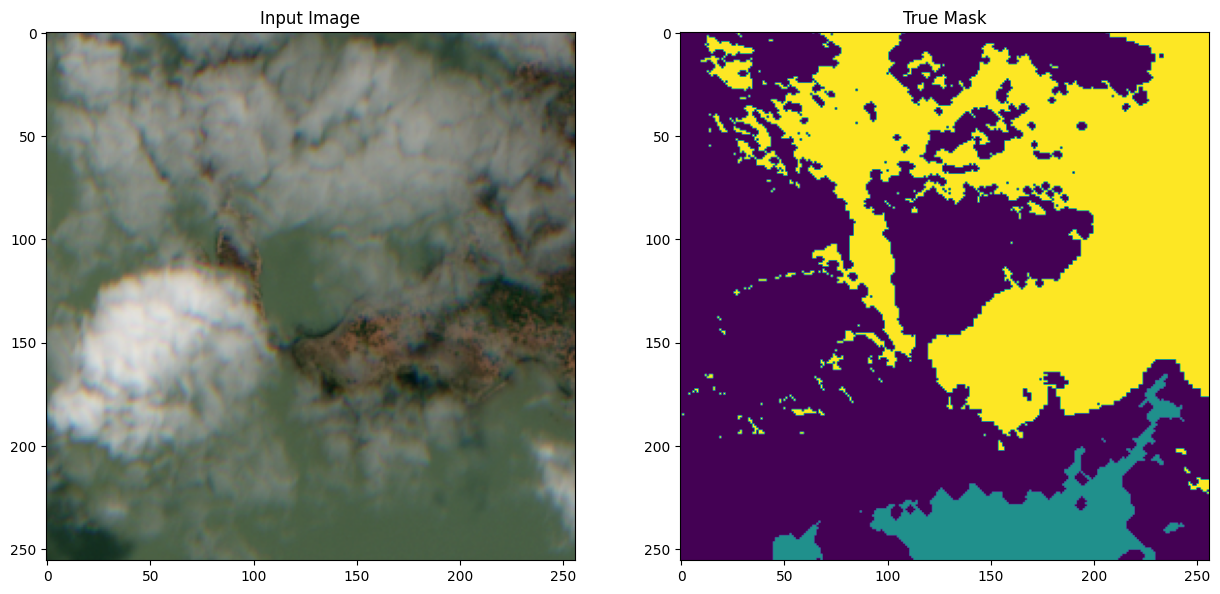

(256, 256, 4) (256, 256)
91.0 | 255.0 | 0.0 | 2.0


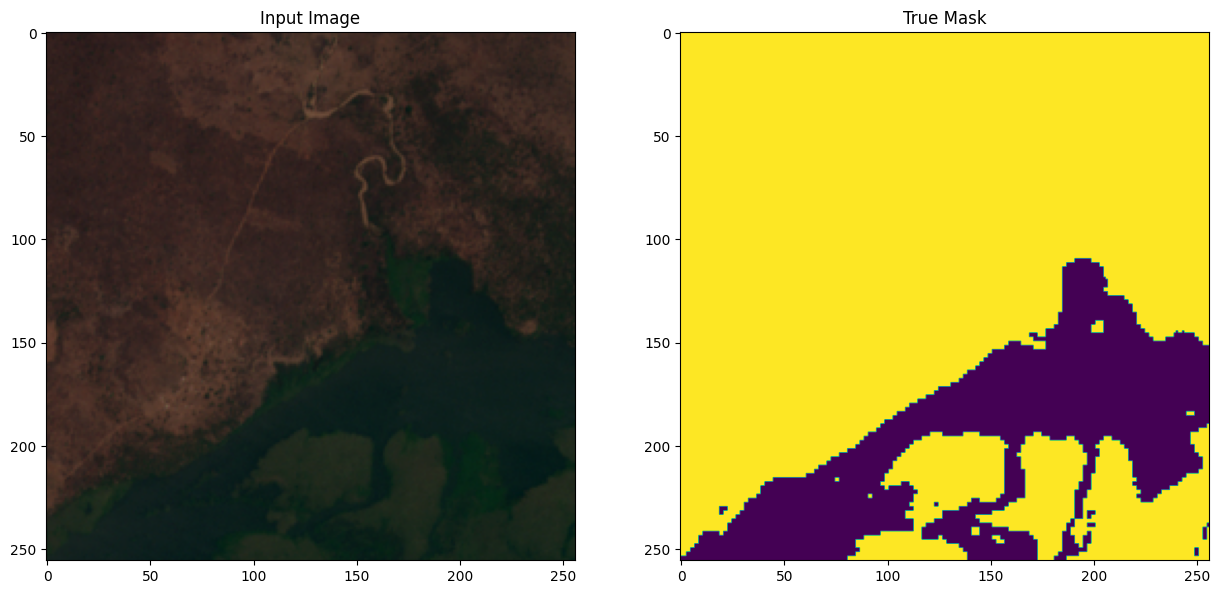

(256, 256, 4) (256, 256)
47.0 | 255.0 | 0.0 | 2.0


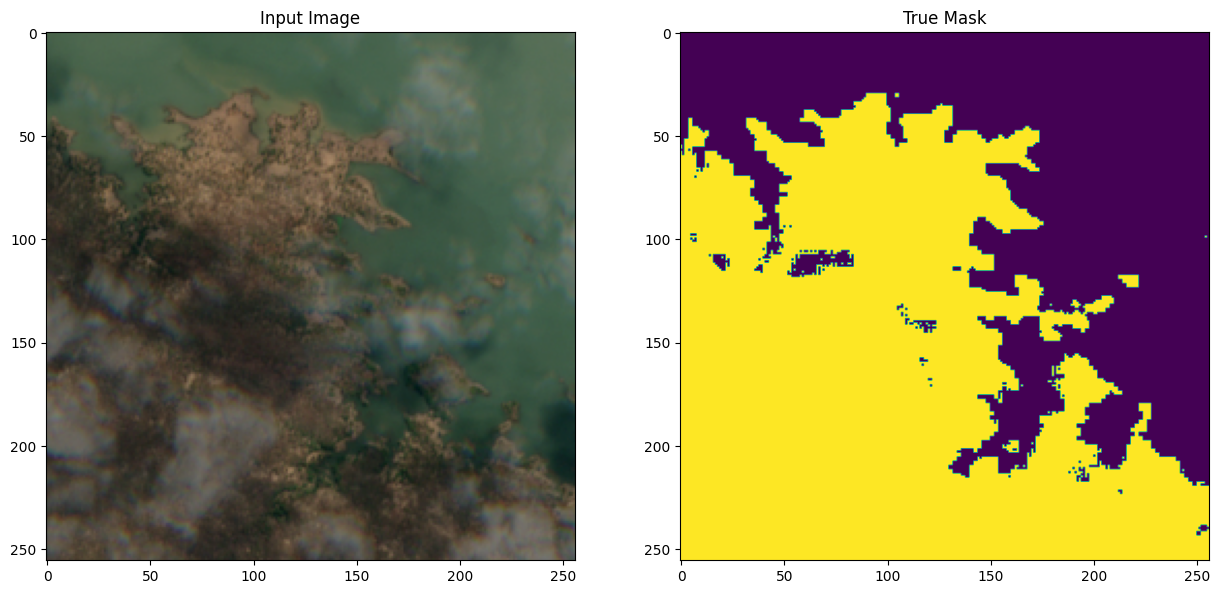

(256, 256, 4) (256, 256)
97.0 | 255.0 | 0.0 | 2.0


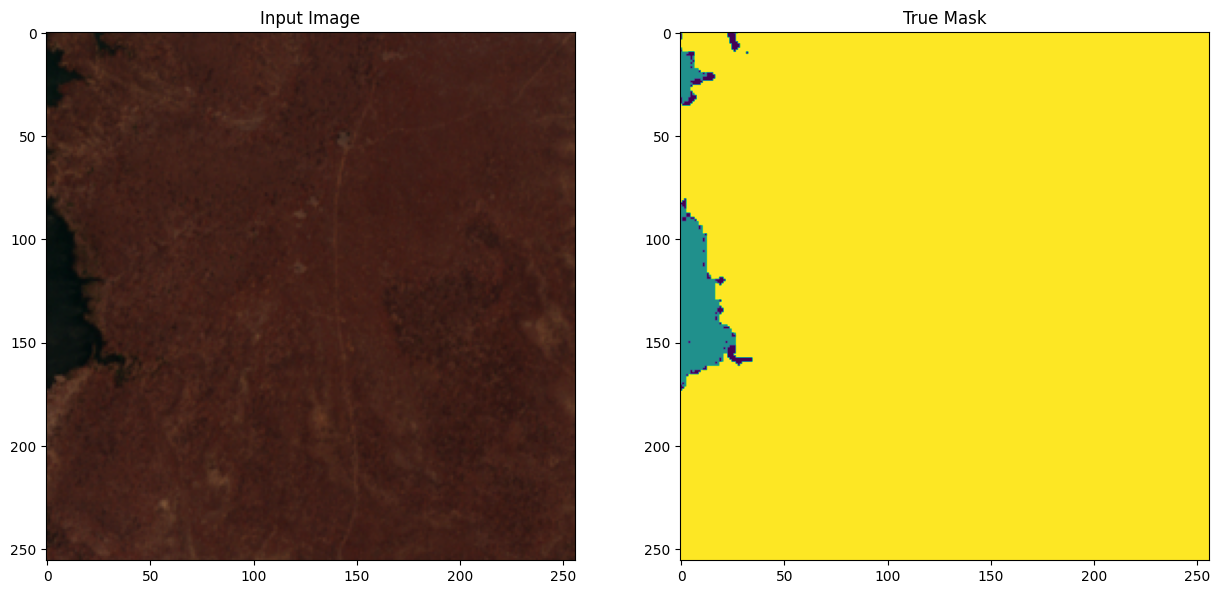

(256, 256, 4) (256, 256)
76.0 | 255.0 | 0.0 | 2.0


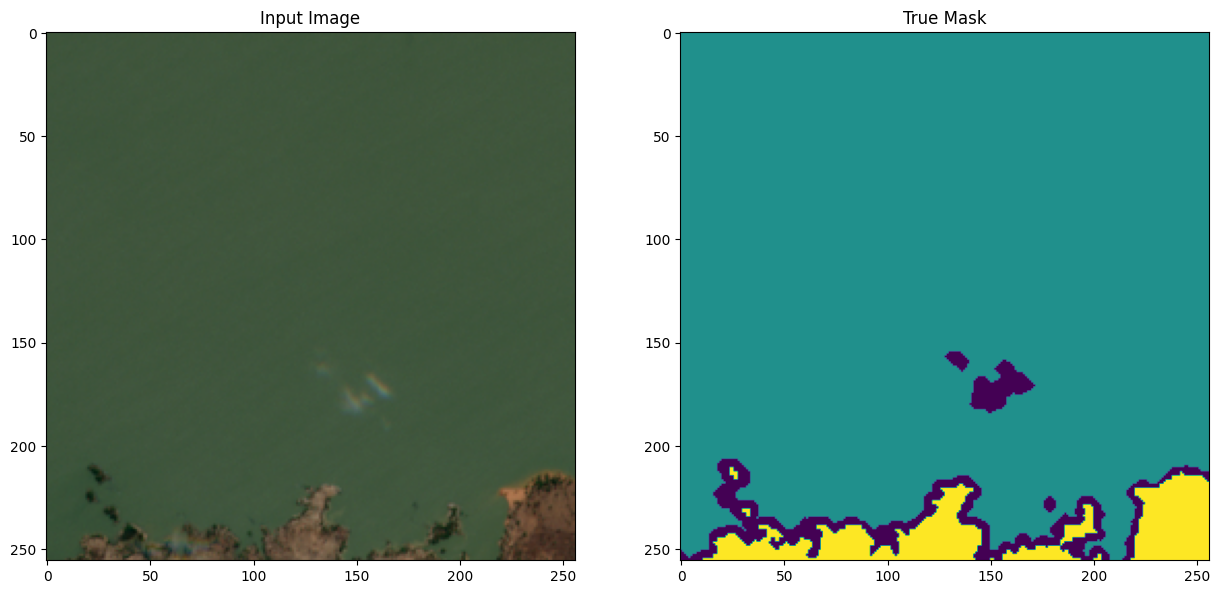

(256, 256, 4) (256, 256)
64.0 | 255.0 | 0.0 | 2.0


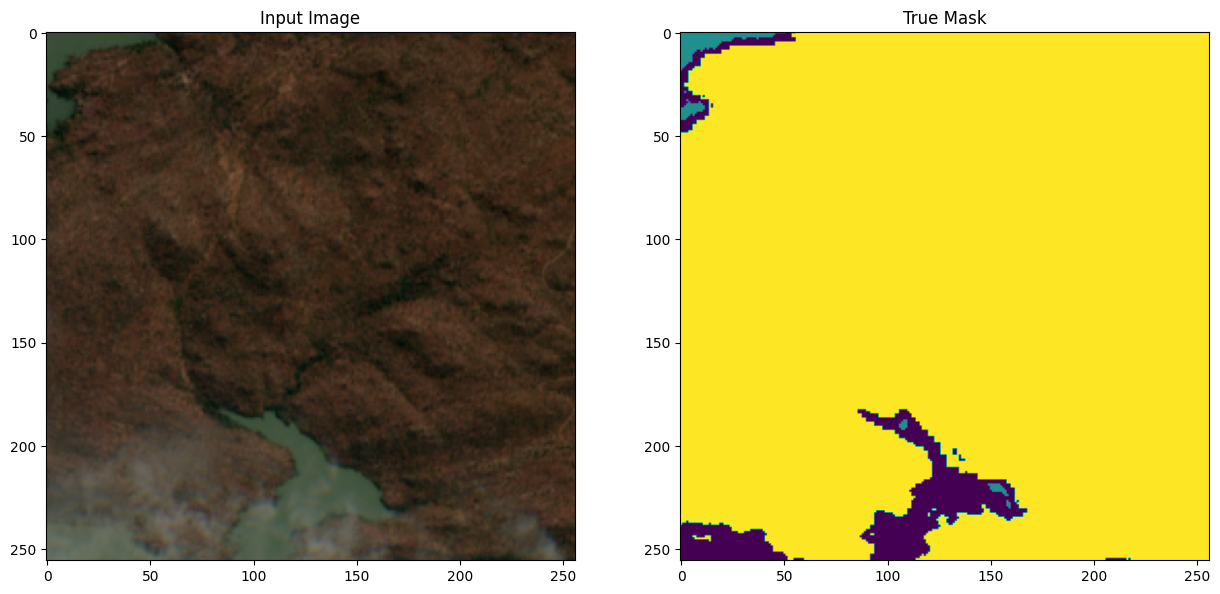

(256, 256, 4) (256, 256)
112.0 | 255.0 | 0.0 | 2.0


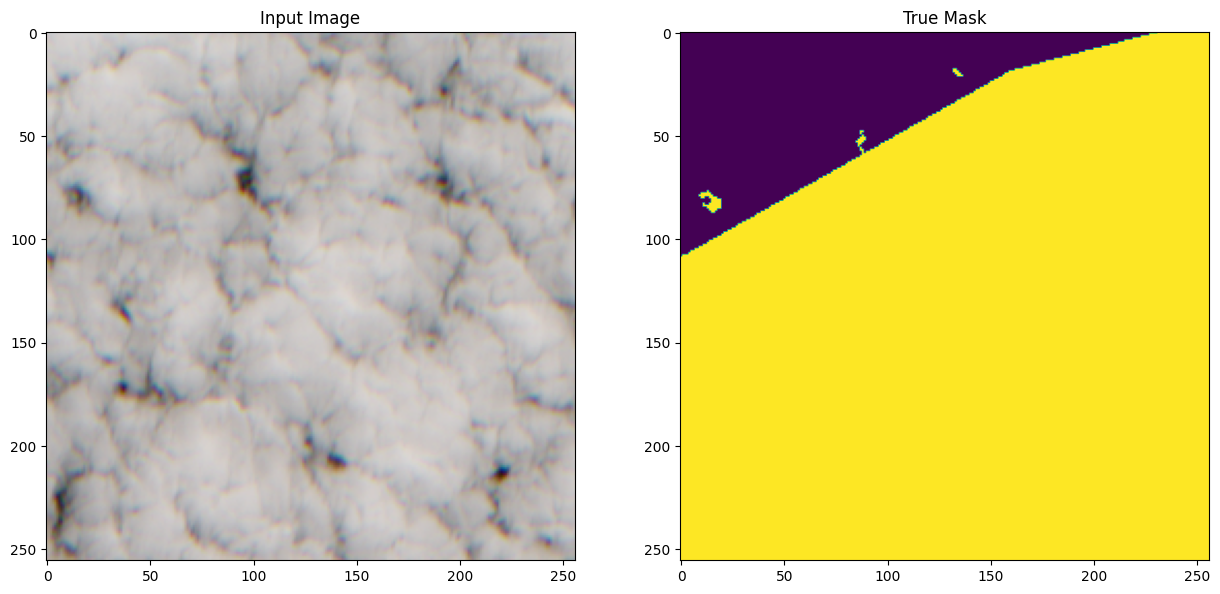

(256, 256, 4) (256, 256)
86.0 | 255.0 | 0.0 | 2.0


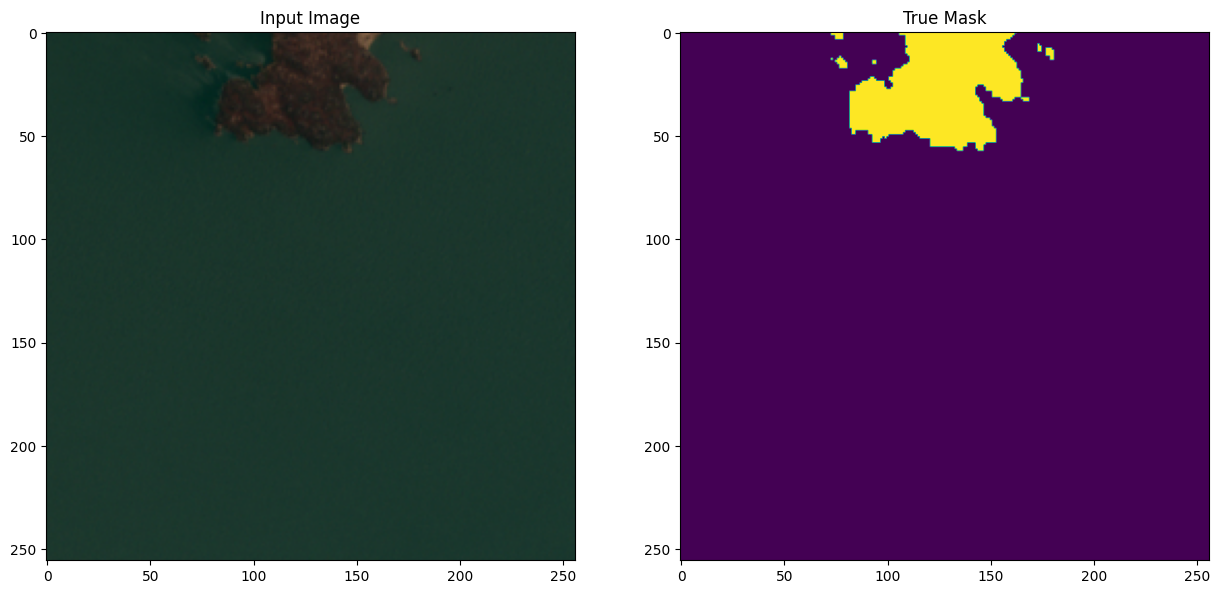

(256, 256, 4) (256, 256)
90.0 | 255.0 | 0.0 | 2.0


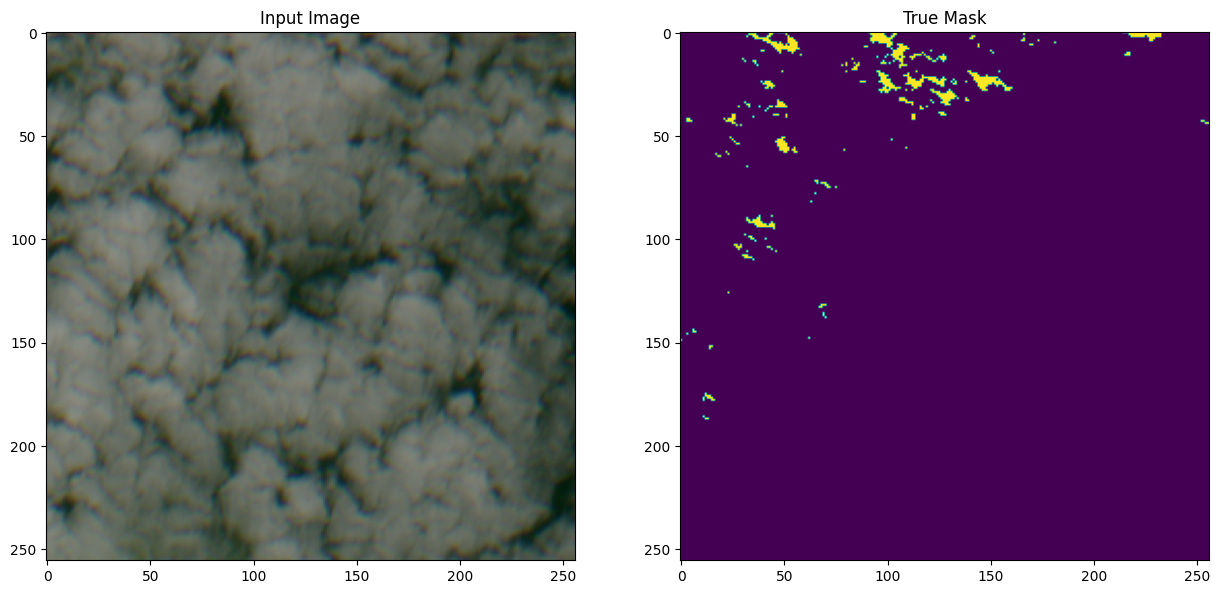

(256, 256, 4) (256, 256)
96.0 | 255.0 | 0.0 | 2.0


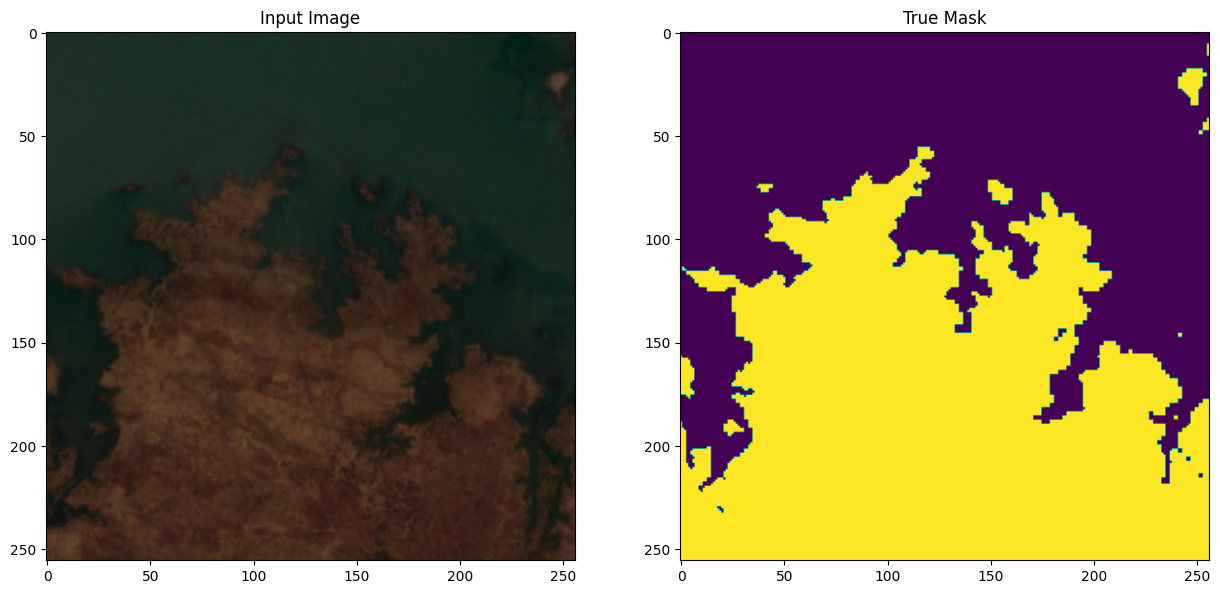

In [82]:
print(train_split_x[10:20].shape)
print(train_split_y[10:20].shape)
display(train_split_x[10:20], train_split_y[10:20])

In [48]:
x_input = np.array([[[[1,2], [3, 5]], [[1,2], [3, 5]]], [[[3,8], [9, 10]], [[1,2], [3, 5]]], [[[1,2], [3, 5]], [[1,2], [3, 5]]], [[[3,8], [9, 10]], [[1,2], [3, 5]]]])
y_mask = np.array([[[1,2],[3,4]],[[5,6],[7,8]], [[1,2],[3,4]],[[5,6],[7,8]]])

X_train, X_val, y_train, y_val = train_test_split(x_input, y_mask, test_size=0.2, random_state=1)
print(x_input)
print()
print(f'X_train: {X_train.shape}')
print(X_train)
print()
print(f'y_train: {y_train.shape}')
print(y_train)
print()
print(f'X_val: {X_val.shape}')
print(X_val)
print()
print(f'y_val: {y_val.shape}')
print(y_val)
print()

[[[[ 1  2]
   [ 3  5]]

  [[ 1  2]
   [ 3  5]]]


 [[[ 3  8]
   [ 9 10]]

  [[ 1  2]
   [ 3  5]]]


 [[[ 1  2]
   [ 3  5]]

  [[ 1  2]
   [ 3  5]]]


 [[[ 3  8]
   [ 9 10]]

  [[ 1  2]
   [ 3  5]]]]

X_train: (3, 2, 2, 2)
[[[[ 1  2]
   [ 3  5]]

  [[ 1  2]
   [ 3  5]]]


 [[[ 1  2]
   [ 3  5]]

  [[ 1  2]
   [ 3  5]]]


 [[[ 3  8]
   [ 9 10]]

  [[ 1  2]
   [ 3  5]]]]

y_train: (3, 2, 2)
[[[1 2]
  [3 4]]

 [[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

X_val: (1, 2, 2, 2)
[[[[ 3  8]
   [ 9 10]]

  [[ 1  2]
   [ 3  5]]]]

y_val: (1, 2, 2)
[[[5 6]
  [7 8]]]



## 2. Preparing overlapping tiles